In [180]:
import pandas as pd
import pandas.api.types as pdtypes
import numpy as np

from plotnine import *
from plydata import *

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from scipy.stats.mstats import mode
from scipy.stats import chisquare
from scipy.spatial.distance import jaccard


from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, LabelBinarizer, StandardScaler

import sklearn.preprocessing, sklearn.decomposition,\
       sklearn.linear_model, sklearn.pipeline, sklearn.metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn_pandas import DataFrameMapper, cross_val_score
from sklearn_pandas import gen_features

import time
import datetime
from datetime import date, datetime, timedelta

pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', 500)

import os

In [ ]:
#### Note: for this notebook to work, I need to select environment testenv where I pip installed plotline and pydata

In [178]:
cwd = os.getcwd()
cwd

'C:\\Users\\mstre\\Dropbox\\0Big_data\\Xpdia\\Mathieu'

In [181]:
segment_data_USA = pd.read_csv('segment_data_USA.csv', sep = "|")
point_data_USA = pd.read_csv('point_data_USA.csv', sep = "|")
segment_data_ROW = pd.read_csv('segment_data_ROW.csv', sep = "|")
point_data_ROW = pd.read_csv('point_data_ROW.csv', sep = "|")


In [190]:
segment_data_ROW

,country,min,max,gap,min_str,max_str,gap_str
0,bleisure_row,8,56,48,8,56,48
1,business_row,12,47,35,12,47,35
2,familynokids_row,6,61,55,6,61,55
3,familywkids_row,5,61,56,5,61,56
4,single_row,8,54,46,8,54,46
5,wegetaway_row,16,33,17,16,33,17


In [189]:
point_data_ROW

,country,age_group,sm_use_percent,sm_use_percent_str
0,bleisure_row,BR,8,8
1,business_row,BR,12,12
2,familynokids_row,BR,6,6
3,familywkids_row,BR,5,5
4,single_row,BR,8,8
5,wegetaway_row,BR,16,16
6,bleisure_row,prebooking%,37,37
7,business_row,prebooking%,41,41
8,familynokids_row,prebooking%,33,33
9,familywkids_row,prebooking%,34,34


C:\Users\mstre\Anaconda3\lib\site-packages\plotnine\ggplot.py:688: UserWarning: Saving 9 x 4 in image.
  from_inches(height, units), units))
C:\Users\mstre\Anaconda3\lib\site-packages\plotnine\ggplot.py:689: UserWarning: Filename: booking_churnUSA.png
  warn('Filename: {}'.format(filename))
C:\Users\mstre\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\mstre\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\mstre\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


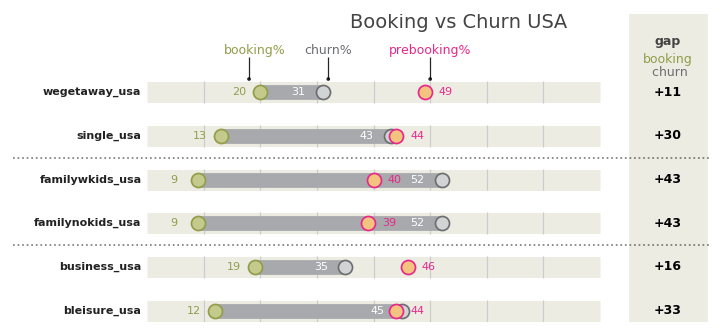

<ggplot: (-9223371878887011068)>

In [200]:
def plot_br_churn(segment_data,point_data, region):

    n=6  # controls number of lines
    df1= point_data[point_data['age_group'] == 'BR']
    df2= point_data[point_data['age_group'] == 'prebooking%']
    df3= point_data[point_data['age_group'] == 'churn%']

    # The right column (book-prebooking) location
    xgap = 92 # 112

    plot=(ggplot()
 
     # Background Strips (grey accross)                                  
     + geom_segment(
         segment_data,
         aes(y='country', yend='country'),
         x=0, xend=80,
         size=8.5,
         color='#edece3'   #444444
     )
     # vertical grid lines along the strips (how to create more?)                 
     + annotate(
         'segment',
         x=   list(range(10, 80, 10)) * n,   
         xend=list(range(10, 80, 10)) * n,   
         y=np.tile(np.arange(1, n+1), 7)-.25,
         yend=np.tile(np.arange(1, n+1), 7) + .25,
         color='#CCCCCC' 
     )
     # Range strip  between book and prebooking
     + geom_segment(
         segment_data,
         aes(x='min', xend='max', y='country', yend='country'),
         size=6,
         color='#a7a9ac'
     )
     # Age group markers (round of various colors)       
     + geom_point(
         point_data,
         aes('sm_use_percent', 'country', color='age_group', fill='age_group'), 
         size=5,
         stroke=0.7,
     )
     # Age group percentages  - does not work due to weird query


      # Booking %       # TEST
     + geom_text(
         df1,
         aes(x='sm_use_percent-5',y='country', label='sm_use_percent_str', color='age_group'),
         size=8,
         ha='left',
         #color='#222222'    #'age_group'
     )

      # prebooking%      # TEST
     + geom_text(
         df2,
         aes(x='sm_use_percent+5',y='country', label='sm_use_percent_str'),
         size=8,
         ha='right',
         color='#e7298a'    #'age_group'
     )

      # Churn %       # TEST
     + geom_text(
         df3,
         aes(x='sm_use_percent-5.5',y='country', label='sm_use_percent_str'),
         size=8,
         ha='left',
         color='white'
         #color='#222222'    #'age_group'
     )


     # countries right-hand-size (instead of y-axis)         # new
     + geom_text(
         segment_data,
         aes(y='country', label='country'),
         x=-1,
         size=8,
         ha='right',
         fontweight='bold',
         color='#222222'
     )
     # gap difference
     + geom_vline(xintercept=xgap, color='#edece3', size=32)  # new
     + geom_text(
         segment_data,
         aes(x=xgap, y='country', label='gap_str'),
         size=9,
         fontweight='bold',
         format_string='+{}'
     )
     # Annotations      
     + annotate('text', x=55, y=n+1.8, label='Booking vs Churn '+region, size=14, color ='#444444',va='top')
     + annotate('text', x=50, y=n+1.1, label='prebooking%', size=9, color='#e7298a', va='top')  #ea9f2f
     + annotate('text', x=32, y=n+1.1, label='churn%', size=9, color='#6d6e71', va='top')
     + annotate('text', x=19, y=n+1.1, label='booking%', size=9, color='#939c49', va='top')

     + annotate('text', x=xgap, y=n+ 1, label='gap', fontweight='bold', size=9, color='#444444', va='bottom', ha='center')
     + annotate('text', x=xgap, y=n+.6, label='booking', size=9, color='#939c49', va='bottom', ha='center')
     + annotate('text', x=xgap, y=n+.3, label='\n churn', size=9, color='#6d6e71', va='bottom', ha='center')
 
     + annotate('point', x=[50, 32, 18], y=n+.3, alpha=0.85, stroke=0)
     + annotate('segment', x=[50, 32, 18], xend=[50, 32, 18], y=n+.3, yend=n+.8, alpha=0.85)
     + annotate('hline', yintercept=[x+0.5 for x in range(2, n, 2)], alpha=.5, linetype='dotted', size=0.7)

     # Better spacing and color                              # new
     + scale_x_continuous(limits=(-18, xgap+2))
     + scale_y_discrete(expand=(0, 0, 0.1, 0))
     + scale_fill_manual(values=['#c3ca8c', '#d1d3d4','#f2c480'  ])   #f2c480 fill 
     + scale_color_manual(values=['#939c49', '#6d6e71', '#e7298a'])  #ea9f2f  scale 
     + guides(color=None, fill=None)
     + theme_void()
     + theme(figure_size=(9, 4))
    )

    filename='booking_churn'+region+'.png'
    plot.save(filename, width=None, height=None, dpi=180)
    return plot

plot_br_churn(segment_data_USA,point_data_USA,'USA')


C:\Users\mstre\Anaconda3\lib\site-packages\plotnine\ggplot.py:688: UserWarning: Saving 9 x 4 in image.
  from_inches(height, units), units))
C:\Users\mstre\Anaconda3\lib\site-packages\plotnine\ggplot.py:689: UserWarning: Filename: booking_churnROW.png
  warn('Filename: {}'.format(filename))
C:\Users\mstre\Anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\mstre\Anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\mstre\Anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


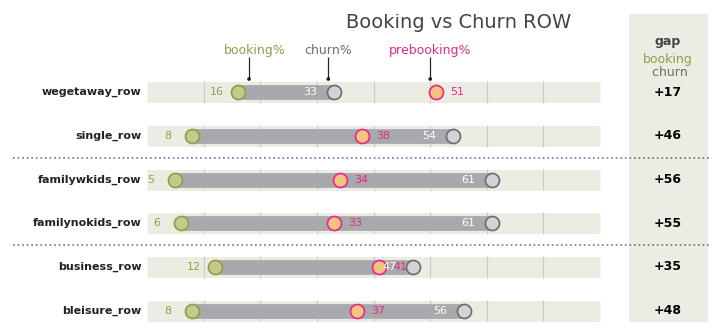

<ggplot: (157968210152)>

In [201]:

plot_br_churn(segment_data_ROW,point_data_ROW,'ROW')
